In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from statsmodels.formula.api import logit

# no interaction - minimal correlation between variables, so we can separate
# them and dont need to account for them depending on each other
age_gl_no_int = logit('Outcome ~ Age + Glucose', data=diabetes_df).fit()
print(age_gl_no_int.params)
# Outcome = 0.024*Age + 0.036*Glucose + -5.91

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64


In [4]:
# with interaction 
age_gl_int = logit('Outcome ~ Age * Glucose', data=diabetes_df).fit()
print(age_gl_int.params)
# Outcome = -9.5 + 0.13*Age + 0.06*Glucose + -0.0008*Age*Glucose

Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# split data into training and test sets
# stratification can be (but is not always) quite helpful
# it tries to split the test data into groups that represent the data well
# instead of randomly selecting from the full set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)
# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
# simplest logistic regression approach
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [8]:
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [9]:
regression.score(X_test, y_test)

0.7077922077922078

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6461200491051238, 0.8172757475083056),
  ('0', '1'): (0.0,
   0.8205980066445181,
   0.6461200491051238,
   0.17940199335548176),
  ('1', '0'): (0.6510951734832332,
   0.0,
   0.34890482651676685,
   0.4983388704318937),
  ('1', '1'): (0.6510951734832332,
   0.5016611295681063,
   0.34890482651676685,
   0.4983388704318937)})

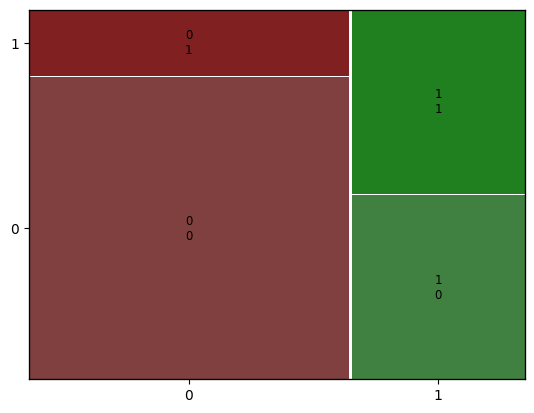

In [11]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

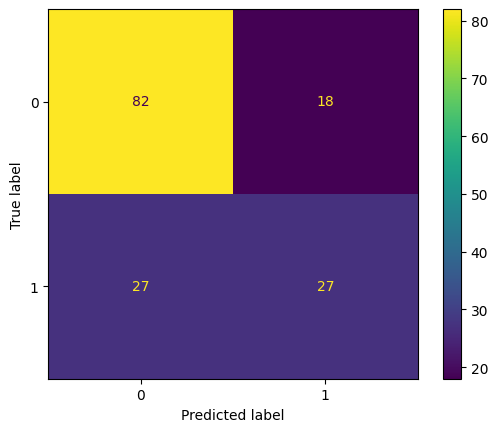

In [12]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [13]:
def precision_and_recall(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    if calc_type == "precision":
        value = tp / (tp + fp)
        # false positive are where we predicted someone would have a 
        # condition and they actually dont
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn) 
        # false negatives are where we predicted someone would not have a 
        # condition and they actually do
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [14]:
precision_and_recall("precision", 27, 82, 18, 27)

0.6

In [15]:
precision_and_recall("recall", 27, 82, 18, 27)

0.5